In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('default')
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# 서포트 벡터 머신
복잡한 분류 문제이면서 데이터셋의 크기가 작거나 중간인 경우 이용되는 서포트 벡터 머신.  
결정 경계를 만들되, 최대한 샘플로 부터 멀리 떨어지도록 정한다. (즉, 마진을 크게 남긴다)  
여기서 샘플을 **서포트 벡터(support vector)** 라고 부르며 도로 경계에 위치한 샘플에 의해 경계가 결정된다.

## 소프트 마진 분류
모든 샘플이 마진 밖에 위치해있다면 다행이지만 (하드 마진) 이렇게 만들기가 어려운 경우,  
최대한 마진을 크게 하면서도 오류를 줄이는 과정이 필요하다.  
이를 **소프트 마진 분류 (soft margin classification)** 라고 한다.  
사이킷런에서 **C** 파라미터가 오류를 얼마나 허용할지를 정한다.  
C가 클수록 오류를 허용하지 않고 마진이 작아진다. 반대로 작을수록 오류를 허용하고 마진이 커진다.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

C가 작을수록 마진이 커지고 과대적합을 막기위해 규제를 걸어준다.  
C가 클수록 마진이 작아지고 모델이 데이터에 익숙해진다.

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 비선형 SVM 분류
선형 SVM이 많은 경우에 잘 작동하지만 비선형 데이터셋의 경우에는 힘들어진다.  
이 경우 다항 특성과 같은 특성을 더 추가하면 된다. (PolynomialFeatures)

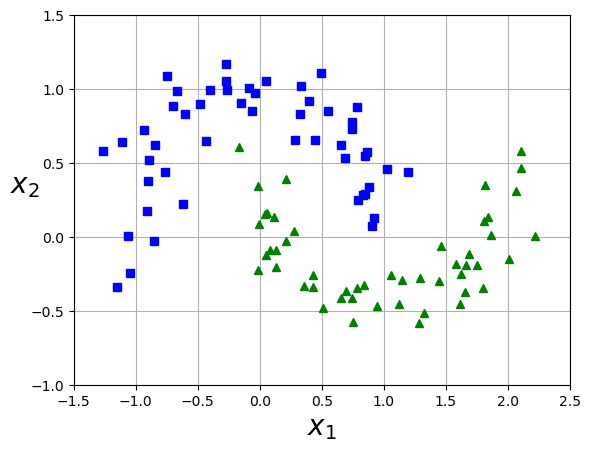

array([0], dtype=int64)

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

polynomial_svm_clf = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X,y)
polynomial_svm_clf.predict([[1,0]]) #(1,0)은 파란색[0]에 속한다.

### 다항식 커널
다항식 특성을 추가하는 것은 간단하고 잘 작동한다.  
하지만 낮은 차수의 다항식은 과소적합을, 높은 차수의 다항식은 과대적합을 일으킨다.  
***커널 트릭*** 을 이용하면 실제로 특성을 추가하진 않지만 마치 많이 추가한 것과 같은 결과를 낼 수 있다.

In [5]:
# 3차항으로 구성된 커널을 이용하여 SVM 분류기를 훈련시키기.
# coef0는 상수항을 의미하며 차수가 높아질수록 1보다 작은값과 큰값의 차이가 벌어지므로 coef0를 통해 조정

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf",
                                 SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf",
                                    SVC(kernel="poly",
                                        degree=10,
                                        coef0=100,
                                        C=5))])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

차수가 낮을수록 과소적합이, 높을수록 과대적합이 나게된다.

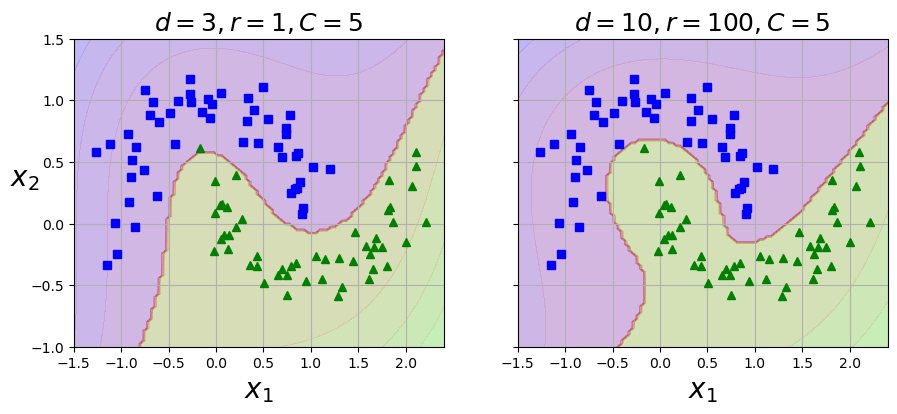

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

### 유사도 특성과 방사 기저 함수 (Radial Basis Function, RBF)
비선형 특성을 다룰 때 다항식 커널 뿐만 아니라  
각 샘플이 특정 랜드마크와 얼마나 닮았는지 정하는 유사도 함수로 계산한 특성을 추가하는 방식이 있다.  
예시로 유사도 함수를 가우시안 방사 기저 함수로 정해보자  
\begin{equation}
    \phi_r(x,l) = exp(-\gamma \lVert x-l  \rVert^{2})
\end{equation}
$l$은 들어오는 샘플의 특성이고 $x$는 미리 정해둔 랜드마크이다.  
만약 미리 정해둔 렌드마크가 2개라면 각각의 가우시안 방사 기저 함수의 값이 계산될 것이고,  
이를 통해 1차원 특성을 2차원으로 변환해주는 것이 가능하다.  
간단하게 모든 데이터셋의 샘플 위치에 랜드마크를 설정하면 차원이 데이터 샘플 개수만큼 늘어고 선형적으로 구분될 수 있지만,  
실제로 특성의 수와 계산된 특성의 수가 달라질 수 있다는 단점이 있다.  
추가로 gamma, $\gamma$ 값이 커질수록 결정 경계가 샘플을 따라 형성되며 불규칙해진다.  
이 과정에서 각 샘플의 영향 범위가 줄어든다.

In [7]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5,
                                               C=0.001))])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

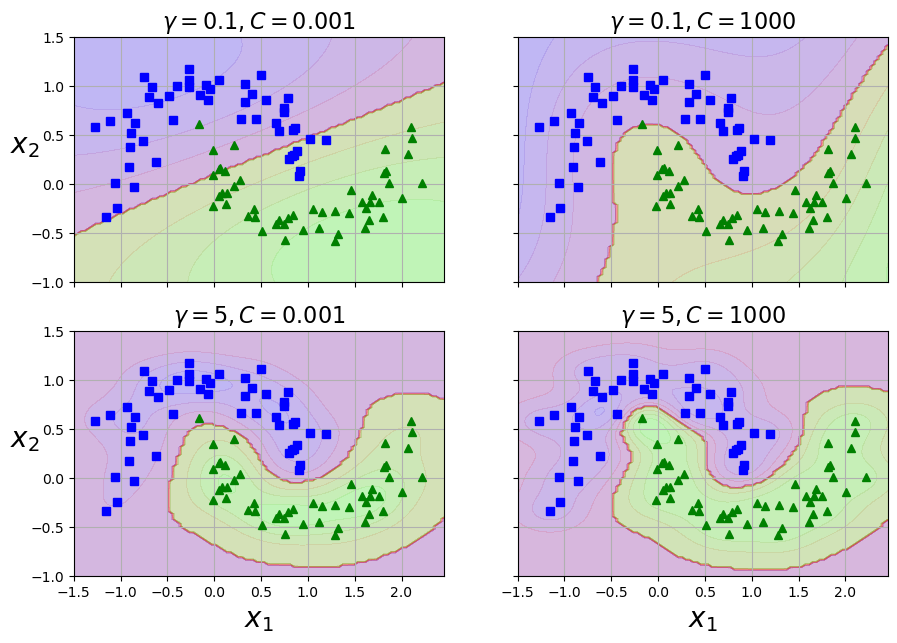

In [8]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf",
                                    SVC(kernel="rbf", gamma=gamma, C=C))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10.5, 7),
                         sharex=True,
                         sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
        
plt.show()

## SVM 회귀
내용이 위쪽과 비슷하지만 이번에는 제한된 마진 오류 내에서 최대한 마진 내에 많은 샘플들이 들어가도록 학습한다.  
마진의 폭은 $\epsilon$ 값으로 조절한다.  
마진 안에서 훈련 샘플이 추가되더라도 모델에는 영향이 없으므로 **$\epsilon$에 민감하지 않다** 고 부른다.  
이전에 C가 클수록 마진오류를 허용하지 않기에 마진이 작아진다고 썻는데 회귀에서는 마진이 작아질수록 오류가 증가한다.  
따라서 회귀에서 C는 클수록 규제가 적음을 의미하고 반대로 C가 작을수록 마진이 커지기에 오류가 감소한다.  
따라서 C가 작아질수록 규제가 많아짐을 의미한다.

## SVM 이론
선형 SVM 분류기는 **마진 오류를 일으키지 않거나 (하드 마진),  
제한된 마진 오류에서 최대한 큰 마진을 획득하는 것을 목표로 한다 (소프트 마진)**  
선형 SVM 분류기는 단순히 결정 함수 $w^{T}x+b$ 를 계산해서 새로운 샘플 $x$의 클래스를 예측한다.  
결정 함수 $w^{T}x+b$ 값이 0보다 작다면 음성 클래스(0), 0보다 크다면 양성 클래스(1)을 예측한다.  
SVM 분류기는 위의 두가지 목표를 이룰 수 있는 $w와 b$를 찾고자 한다.  
그런데 결정함수의 기울기를 잘 보면 가중치 벡터의 노름 $\lVert w\rVert$과 같다.  
그런데 이 기울기가 작아질수록 특정 값을 이루는 점들이 경계로 부터 멀어진다.  
**즉 가중치 벡터 $w$가 작을수록 마진이 커진다**  
그리고 마진 오류를 하나도 만들지 않기 위해서는 결정함수가 음성일 때 -1보다 작고 양성일 때 1보다 커야한다.  
이를 위해 음성 샘플일 때 $t^{(i)}=-1$, 양성 샘플일 때 $t^{(i)}=1$로 정의한다면  
$t^{(i)}(w^{T}x+b)\geq 1$로 모든 샘플에 대해 표현할 수 있다.  
이런 두 조건 모두를 만족시켜야 하는 하드 마진 선형 SVM 분류기에서는 다음과 같은 목적 함수를 지닌다.
\begin{equation}
    minimize_{w, b}(\frac{1}{2}w^{T}w = \frac{1}{2}\lVert w\rVert^{2})
\end{equation}
원래는 $\lVert w\rVert$ 를 최소화 해야하지만 $w$가 0이 되는 지점에서 미분불능이기 때문에 전자를 이용한다.
<br>
<br>
소프트마진의 경우 어느정도 마진 오류가 발생하는 것을 허용한다.  
따라서 각 $샘플^{(i)}$에 대하여 얼마나 마진을 위반할지를 정하는 슬랙 변수 $\zeta^{(i)} \geq0$를 도입한다
<br>
\begin{equation}
    minimize_{w, b, \zeta} (\frac{1}{2}w^{T}w + C\sum^{m}_{i=1}\zeta^{(i)})
\end{equation}
여기서 $C$는 마진 오류를 발생시키면서도 마진을 넓히려는 두 목표 사이의 트레이드 오프를 정의한다.